## Input data 

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
from PIL import Image
from io import BytesIO

plt.style.use('classic')
%matplotlib inline

In [42]:
# read excel file
df = pd.read_excel('C:/Users/acc_a/OneDrive/PhOLED.xlsx', sheetname='lessfeature')
df = df[list(df.columns)[1:]]
print(df.shape)
df.head()

(165, 25)


homo_HIL  thickness_HIL  lumo_HTL1  homo_HTL1  thickness_HTL1  lumo_HTL2  \
0       5.2           25.0        3.3        5.2               0        3.3   
1       5.2           25.0        3.3        5.2               0        3.3   
2       5.2           25.0        3.3        5.2               0        3.3   
3       5.2           25.0        3.3        5.2               0        3.3   
4       5.2           25.0        3.3        5.2               0        3.3   

   homo_HTL2  thickness_HTL2  total_HTL_thickness  triplet_HTL     ...      \
0        5.2               0                    0          0.0     ...       
1        5.2               0                    0          0.0     ...       
2        5.2               0                    0          0.0     ...       
3        5.2               0                    0          0.0     ...       
4        5.2               0                    0          0.0     ...       

   homo_dopant  triplet_dopant  dopant_percentage  triplet_ETL  lumo_ETL2  \
0          5.7             2.7               11.0          2.6        2.8   
1          5.7             2.7               15.0          2.6        2.8   
2          5.7             2.7               15.0          2.6        2.8   
3          5.7             2.7               15.0          2.6        2.8   
4          5.7             2.7               20.0          2.6        2.8   

   homo_ETL2  thickness_ETL2  cathode_workfunction  thickness_EIL  efficiency  
0        6.2              35                   2.8           10.0         5.0  
1        6.2              35                   2.8           10.0         4.0  
2        6.2              35                   2.8           10.0         9.0  
3        6.2              35                   2.8           10.0        12.0  
4        6.2              35                   2.8           10.0         8.0  

[5 rows x 25 columns]

In [16]:
#Checking for missing data
NAs = df.isnull().sum()
NAs.sort_values(0, ascending=False)
NAs[NAs > 0] #check wnumber of null values in column

# np.nonzero(pd.isnull(df.values).any(1)) #check the index of missing value

#drop the missing data
# df.dropna(axis=0, inplace=True)
# print(df.shape)

Series([], dtype: int64)

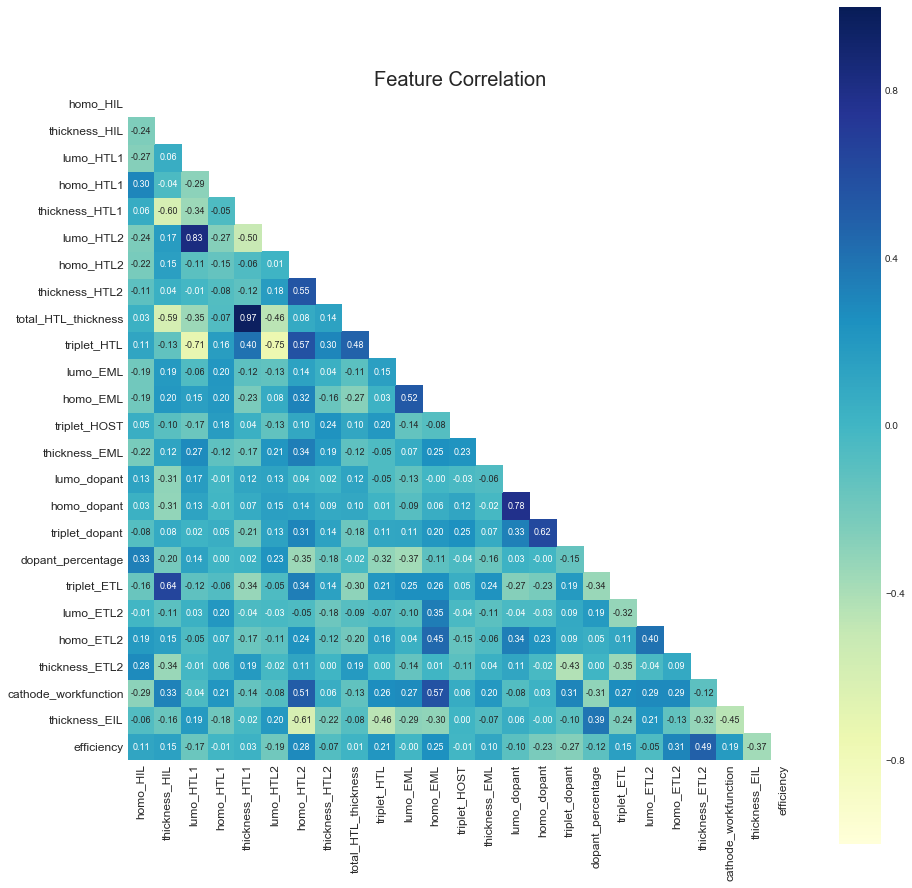

List the features in descending order of their correlation with cd/A:

thickness_ETL2:   0.48949906184313785
thickness_EIL:   -0.3700841684688218
homo_ETL2:   0.30935869004313205
homo_HTL2:   0.28163290078019976
triplet_dopant:   -0.2664253059569266
homo_EML:   0.24527695389468188
homo_dopant:   -0.23159787019268274
triplet_HTL:   0.21356221841115183
lumo_HTL2:   -0.18848976499744513
cathode_workfunction:   0.1853249603130142
lumo_HTL1:   -0.1669503107476716
triplet_ETL:   0.14936974484874924
thickness_HIL:   0.14590338291263072
dopant_percentage:   -0.11641850722112916
homo_HIL:   0.10961648018792597
lumo_dopant:   -0.10428593591465059
thickness_EML:   0.10168035601003739
thickness_HTL2:   -0.07154198905017692
lumo_ETL2:   -0.05217210014673435
thickness_HTL1:   0.030617886257811814
total_HTL_thickness:   0.012157990744422576
homo_HTL1:   -0.007641015944161999
triplet_HOST:   -0.006487094474510347
lumo_EML:   -0.002093186430406897


In [17]:
X = df[list(df.columns)[:]]

corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu",linecolor='black', mask=mask, annot=True, fmt = '.2f', 
                annot_kws={"size":9})
    plt.yticks(rotation=0,fontsize=12)
    plt.xticks(rotation=90,fontsize=12)
    plt.title('Feature Correlation ',fontsize=20)
#     plt.savefig('heatmap.png', format='png', dpi=600)
    plt.show();

cor_dict = corr['efficiency'].to_dict()
del cor_dict['efficiency']
print("List the features in descending order of their correlation with cd/A:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))

In [18]:
X = df.iloc[:, :-1]
y = df[['efficiency']]
print(X.shape)
X.head()

(165, 24)


homo_HIL  thickness_HIL  lumo_HTL1  homo_HTL1  thickness_HTL1  lumo_HTL2  \
0       5.2           25.0        3.3        5.2               0        3.3   
1       5.2           25.0        3.3        5.2               0        3.3   
2       5.2           25.0        3.3        5.2               0        3.3   
3       5.2           25.0        3.3        5.2               0        3.3   
4       5.2           25.0        3.3        5.2               0        3.3   

   homo_HTL2  thickness_HTL2  total_HTL_thickness  triplet_HTL      ...        \
0        5.2               0                    0          0.0      ...         
1        5.2               0                    0          0.0      ...         
2        5.2               0                    0          0.0      ...         
3        5.2               0                    0          0.0      ...         
4        5.2               0                    0          0.0      ...         

   lumo_dopant  homo_dopant  triplet_dopant  dopant_percentage  triplet_ETL  \
0          3.0          5.7             2.7               11.0          2.6   
1          3.0          5.7             2.7               15.0          2.6   
2          3.0          5.7             2.7               15.0          2.6   
3          3.0          5.7             2.7               15.0          2.6   
4          3.0          5.7             2.7               20.0          2.6   

   lumo_ETL2  homo_ETL2  thickness_ETL2  cathode_workfunction  thickness_EIL  
0        2.8        6.2              35                   2.8           10.0  
1        2.8        6.2              35                   2.8           10.0  
2        2.8        6.2              35                   2.8           10.0  
3        2.8        6.2              35                   2.8           10.0  
4        2.8        6.2              35                   2.8           10.0  

[5 rows x 24 columns]

## Random forest

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=26)

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, LeaveOneOut

regressor = RandomForestRegressor(random_state=7, n_estimators=110)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

kfold = KFold(n_splits=4, shuffle=True, random_state=27)
loo = LeaveOneOut()
r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.67491847  0.72505367  0.48322441  0.69796626]
mean R2 score:  0.645290699986 

RMSE mean:  8.08523084165 

R-squared test:  0.692624290612
RMSE:  8.06788243766


In [37]:
importance = regressor.feature_importances_.tolist()
names = list(X)

importance, names = zip(*sorted(zip(importance, names), reverse=True))
importance = [round(float(i), 3) for i in importance]

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'column', 'importance'))
for i, (name, coef) in enumerate(zip(names, importance)):
    print(fmt.format(i, name, coef))

        column              importance
0       triplet_ETL         0.231
1       thickness_ETL2      0.122
2       thickness_EIL       0.117
3       triplet_HOST        0.102
4       homo_EML            0.07
5       lumo_EML            0.037
6       homo_ETL2           0.035
7       thickness_HIL       0.033
8       triplet_dopant      0.026
9       homo_HIL            0.026
10      lumo_ETL2           0.021
11      thickness_HTL1      0.021
12      homo_dopant         0.021
13      thickness_HTL2      0.019
14      thickness_EML       0.019
15      lumo_dopant         0.018
16      cathode_workfunction0.015
17      homo_HTL2           0.014
18      dopant_percentage   0.014
19      total_HTL_thickness 0.013
20      triplet_HTL         0.009
21      homo_HTL1           0.007
22      lumo_HTL2           0.006
23      lumo_HTL1           0.003


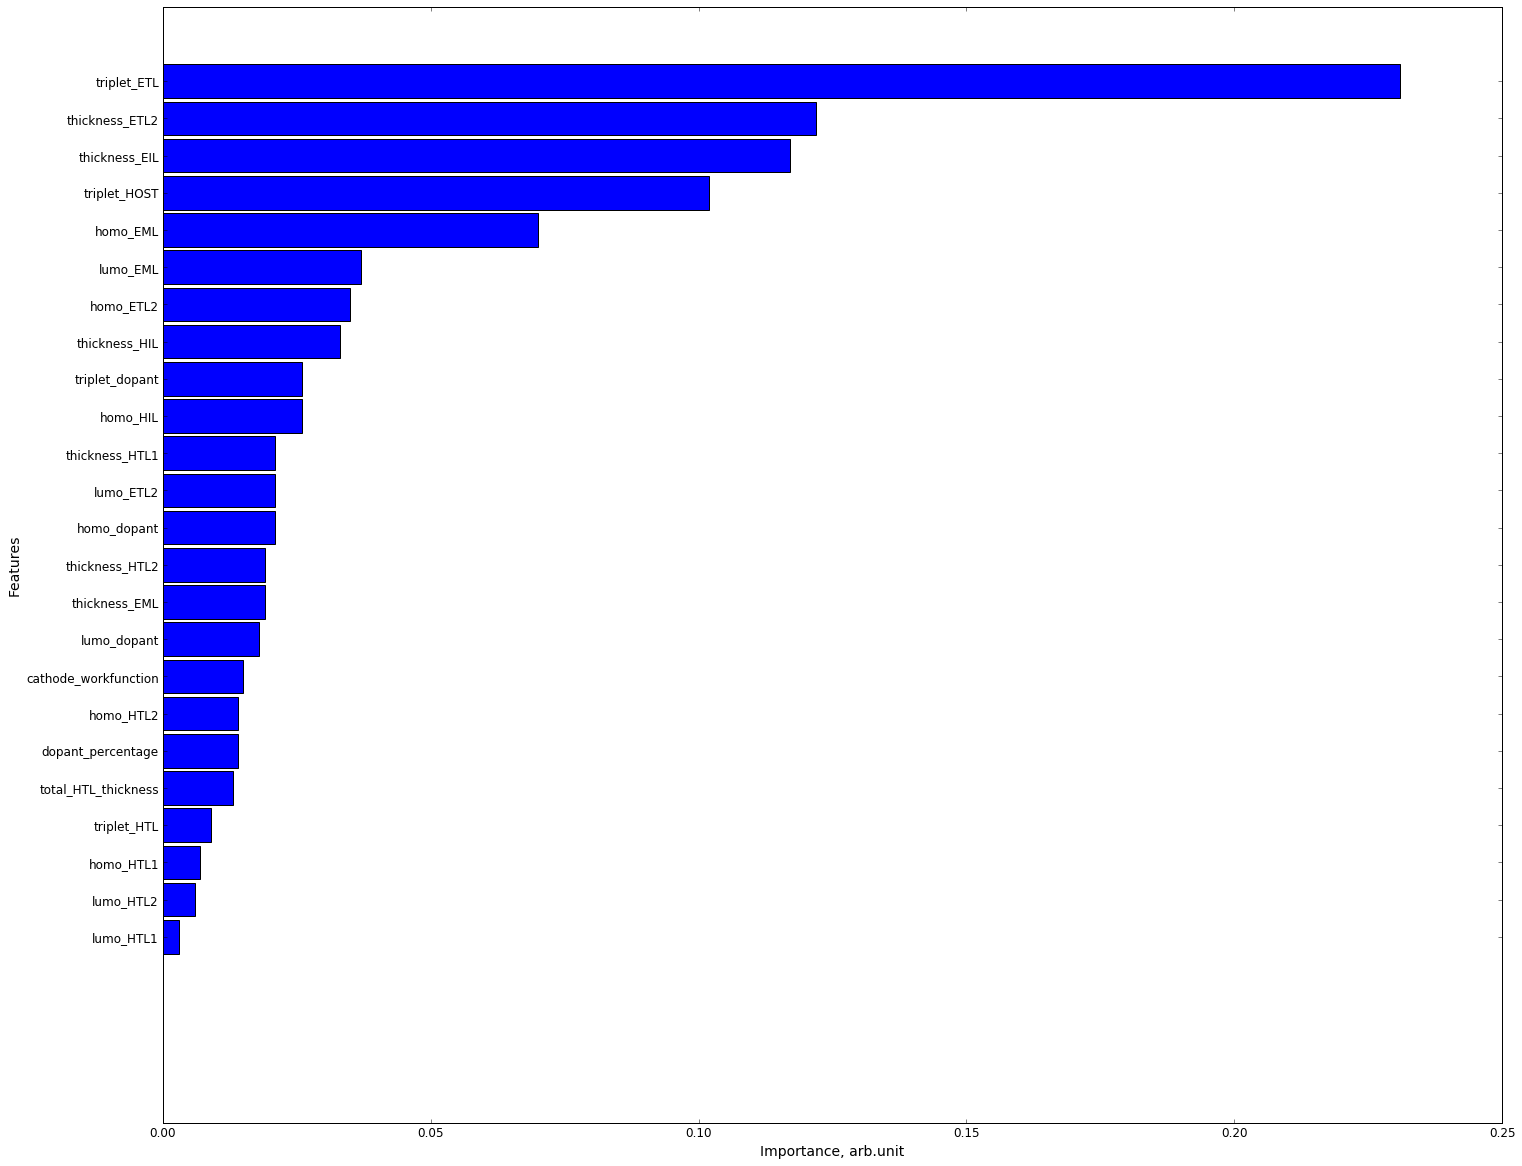

In [38]:
importance, names = zip(*sorted(zip(importance, names), reverse=False))
x = np.arange(24)
plt.figure(figsize=(24,20));
fig = plt.barh(x, importance, 0.9, align='center')
plt.xlabel('Importance, arb.unit',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.yticks(x,names,fontsize=12)
plt.xticks( fontsize=12);

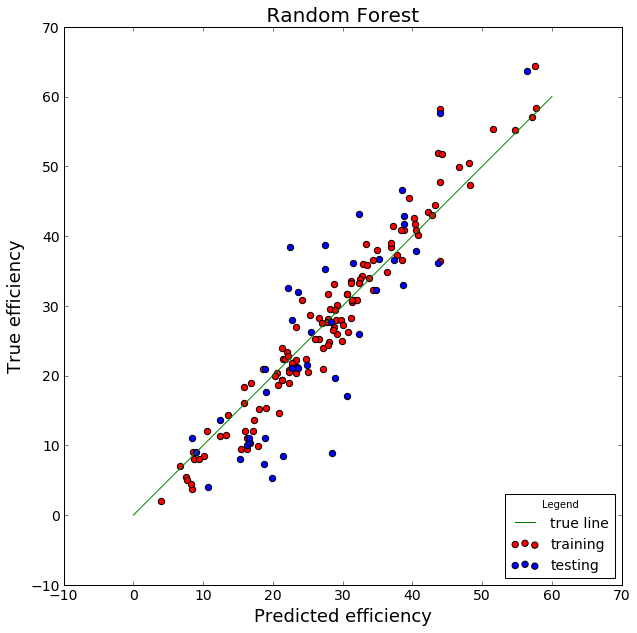

In [39]:
pred_train = regressor.predict(X_train)

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(pred_train, y_train, c='r', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' Random Forest ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

In [40]:
dataset = pd.DataFrame({'true_y':list(y_test.values.ravel()), 'pred_y': list(y_predictions)}, 
                       columns=['true_y', 'pred_y'], index=y_test.index.values)

dataset['error'] = abs(dataset['true_y'] - dataset['pred_y'])
# print(len(dataset))
dataset = dataset.sort_values(by='error', ascending=False)

index = dataset.index.values[:21]
dataset.head(10)

true_y     pred_y      error
14    8.864103  28.494872  19.630769
90   38.500000  22.459551  16.040449
71    5.300000  19.934895  14.634895
116  57.600000  43.884154  13.715846
137  17.041282  30.598307  13.557024
69    8.500000  21.495128  12.995128
8     7.370000  18.783608  11.413608
148  38.661538  27.438501  11.223038
21   43.200000  32.381448  10.818552
120  32.600000  22.204470  10.395530

## linear regression

In [45]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.33147396  0.4034723   0.19619383  0.29110303]
mean R2 score:  0.305560778933 

RMSE mean:  10.6495602315 

R-squared test:  0.403408350064
RMSE:  11.2399239934


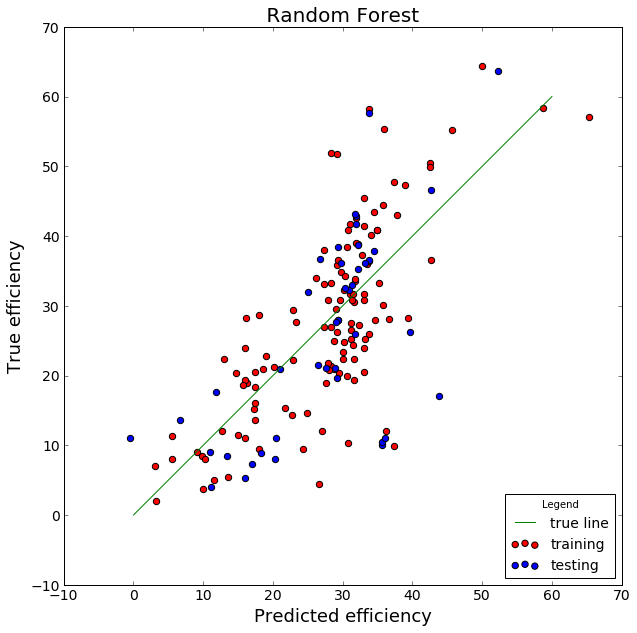

In [46]:
pred_train = regressor.predict(X_train)

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(pred_train, y_train, c='r', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' Random Forest ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

In [47]:
dataset = pd.DataFrame({'true_y':list(y_test.values.ravel()), 'pred_y': list(y_predictions)}, 
                       columns=['true_y', 'pred_y'], index=y_test.index.values)

dataset['error'] = abs(dataset['true_y'] - dataset['pred_y'])
# print(len(dataset))
dataset = dataset.sort_values(by='error', ascending=False)

index = dataset.index.values[:21]
dataset.head(10)

true_y     pred_y      error
137  17.041282  43.839527  26.798244
134  10.000000  35.588055  25.588055
132  10.500000  35.624185  25.124185
133  11.000000  36.036971  25.036971
116  57.600000  33.808894  23.791106
95   26.300000  39.594589  13.294589
29    8.000000  20.308111  12.308111
84   11.000000  -0.429181  11.429181
142  63.653846  52.246346  11.407500
21   43.200000  31.801017  11.398983

## XGboost

In [56]:
from xgboost import XGBRegressor, plot_importance

regressor = XGBRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.57606502  0.7285071   0.39650312  0.61518537]
mean R2 score:  0.579065153375 

RMSE mean:  8.52743809595 

R-squared test:  0.7020376004
RMSE:  7.94338332287


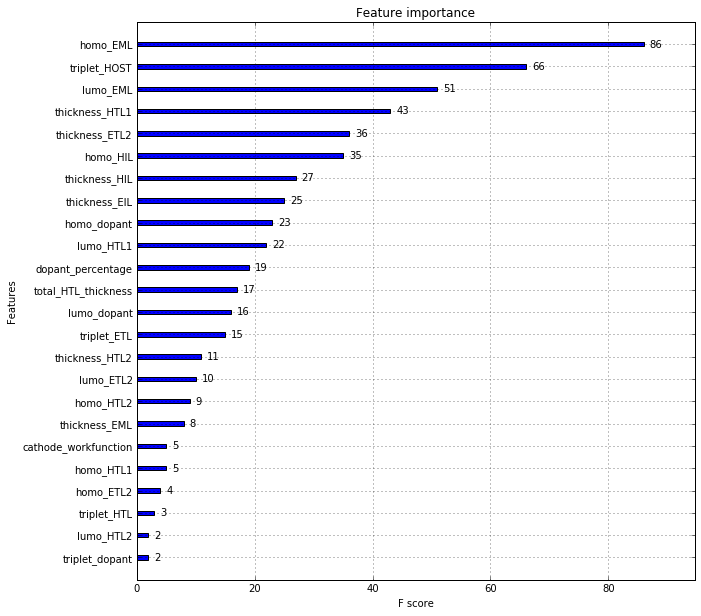

In [57]:
plot_importance(regressor);

## Adaboost

In [55]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.63419402  0.58215682  0.53616421  0.65657214]
mean R2 score:  0.602271797144 

RMSE mean:  8.59973971142 

R-squared test:  0.576902733985
RMSE:  9.46552918054


In [58]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score

estimator = list(np.arange(10, 400, 10))
parameters = {
                'n_estimators': estimator,
                'loss': ('linear', 'square', 'exponential')
             }
regressor = AdaBoostRegressor()
reg = GridSearchCV(regressor, parameters, verbose=3, scoring='neg_mean_squared_error', cv=kfold, n_jobs=-1)

reg.fit(X_train, y_train.values.ravel())
print('Best score: %0.3f' % -reg.best_score_)
print('Best parameters set:')
best_parameters = reg.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))
    
y_predictions = reg.predict(X_test)
print('r2 on test set:', r2_score(y_test, y_predictions))

Fitting 4 folds for each of 117 candidates, totalling 468 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed:  1.8min finished


Best score: -97.095
Best parameters set:
	loss: 'exponential'
	n_estimators: 20
r2 on test set: 0.593901384416


In [61]:
regressor = AdaBoostRegressor(loss='exponential', n_estimators=20)
regressor.fit(X_train, y_train.values.ravel())

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.62653353  0.6316902   0.55601708  0.55757381]
mean R2 score:  0.592953655044 

RMSE mean:  8.68370855732 

R-squared test:  0.546682060178
RMSE:  9.27343310871


## Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.5804419   0.71145573  0.53048915  0.6405991 ]
mean R2 score:  0.615746471089 

RMSE mean:  8.3552283797 

R-squared test:  0.668935952497
RMSE:  8.37299437284


## KNN regression

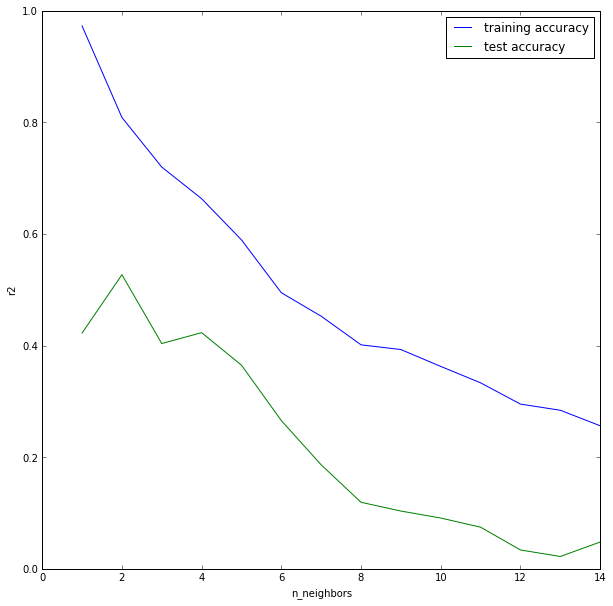

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaler.fit(X_train)
xtrain_scaled = scaler.transform(X_train)
xtest_scaled = scaler.transform(X_test)

training_coefficient = []
test_coefficient = []
# try n_neighbors from 1 to 15
neighbors_settings = range(1, 15)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(xtrain_scaled, y_train)
    # record training set accuracy
    training_coefficient.append(knn.score(xtrain_scaled, y_train))
    # record test set accuracy
    test_coefficient.append(knn.score(xtest_scaled, y_test))
    
plt.plot(neighbors_settings, training_coefficient, label="training accuracy")
plt.plot(neighbors_settings, test_coefficient, label="test accuracy")
plt.ylabel("r2")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')



In [53]:
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.39032031  0.59713825  0.13460565  0.36587804]
mean R2 score:  0.371985564883 

RMSE mean:  9.66707764239 

R-squared test:  0.533568407417
RMSE:  9.93845254785
